In [69]:
import os
from pathlib import Path

list(Path("data").iterdir())

good_seeds = ["2", "3", "4", "5", "7"]

pathes = list(map(lambda x: f'data/2024-03-26_103819_seed_{x}', good_seeds))

In [70]:
pathes = []

for path in Path("data").iterdir(): 
    if str(path).split("_")[-1] in good_seeds:
        pathes.append(path)
    

In [71]:
import pandas as pd

learning_curves = []
for path in pathes:
    learning_curves.append(pd.read_csv(path / "learning curve.csv").iloc[:, 1])
    

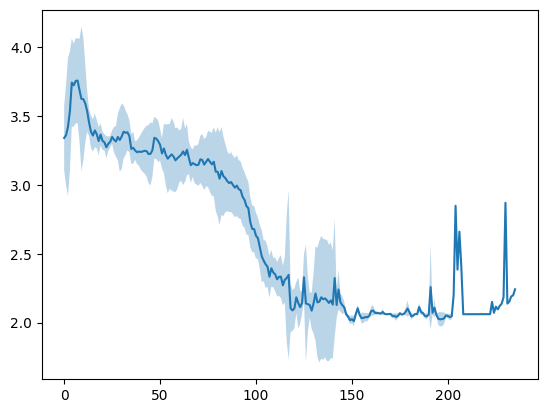

In [72]:
means = pd.concat(learning_curves, axis=1).median(axis=1)
stds = pd.concat(learning_curves, axis=1).std(axis=1)
import matplotlib.pyplot as plt
means.plot()
plt.fill_between(means.index, means - stds, means + stds, alpha=0.3)